In [1]:
using AlgebraicStockFlow

using LabelledArrays
using OrdinaryDiffEq
using Plots
using JSON

using Catlab
using Catlab.CategoricalAlgebra
using Catlab.Graphics
using Catlab.Programs
using Catlab.Theories
using Catlab.WiringDiagrams

using LabelledArrays
using LinearAlgebra: mul!

using Catlab.WiringDiagrams
using Catlab.Programs.RelationalPrograms

┌ Info: Precompiling AlgebraicStockFlow [58c4a0e8-2944-4d18-9fa2-e17726aee9e5]
└ @ Base loading.jl:1278


In [2]:
f_birth_l(u,t)=0.001*(u.S+u.I+u.R)
f_inf_l(u,t)= 0.1*u.S*u.I/(u.S+u.I+u.R)
f_rec_l(u,t)=0.05*u.I
f_deathS_l(u,t)=u.S*0.001
f_deathI_l(u,t)=u.I*0.001
f_deathR_l(u,t)=u.R*0.001

f_deathR_l (generic function with 1 method)

In [3]:
sir_LabelledLinkedStockFlowC=LabelledLinkedStockFlowC{Function, Int}((:birth=>(f_birth_l,(:S,:I,:R)), :inf=>(f_inf_l,(:S,:I,:R)), :rec=>(f_rec_l,:I), :deathS=>(f_deathS_l,:S), :deathI=>(f_deathI_l,:I), :deathR=>(f_deathR_l,:R)), (:S, 990)=>(:birth,(:inf,:deathS),(:birth,:inf,:deathS)), (:I, 10)=>(:inf,(:rec,:deathI),(:birth,:inf,:rec,:deathI)),(:R, 0)=>(:rec,:deathR,(:birth,:inf,:deathR)))


ACSet with elements F = 1:6, S = 1:3, I = 1:3, O = 1:5, L = 1:10
┌───┬────────────┬────────┬──────────────┐
│ F │   funcFlow │  fname │          fls │
├───┼────────────┼────────┼──────────────┤
│ 1 │  f_birth_l │  birth │ [:S, :I, :R] │
│ 2 │    f_inf_l │    inf │ [:S, :I, :R] │
│ 3 │    f_rec_l │    rec │         [:I] │
│ 4 │ f_deathS_l │ deathS │         [:S] │
│ 5 │ f_deathI_l │ deathI │         [:I] │
│ 6 │ f_deathR_l │ deathR │         [:R] │
└───┴────────────┴────────┴──────────────┘
┌───┬──────────────┬───────┐
│ S │ initialValue │ sname │
├───┼──────────────┼───────┤
│ 1 │          990 │     S │
│ 2 │           10 │     I │
│ 3 │            0 │     R │
└───┴──────────────┴───────┘
┌───┬─────┬────┐
│ I │ ifn │ is │
├───┼─────┼────┤
│ 1 │   1 │  1 │
│ 2 │   2 │  2 │
│ 3 │   3 │  3 │
└───┴─────┴────┘
┌───┬─────┬────┐
│ O │ ofn │ os │
├───┼─────┼────┤
│ 1 │   2 │  1 │
│ 2 │   4 │  1 │
│ 3 │   3 │  2 │
│ 4 │   5 │  2 │
│ 5 │   6 │  3 │
└───┴─────┴────┘
┌────┬────┬────┐
│  L │ ls │ lf │
├────┼────┼────┤
│  1 │  1 │  1 │
│  2 │  1 │  2 │
│  3 │  1 │  4 │
│  4 │  2 │  1 │
│  5 │  2 │  2 │
│  6 │  2 │  3 │
│  7 │  2 │  5 │
│  8 │  3 │  1 │
│  9 │  3 │  2 │
│ 10 │  3 │  6 │
└────┴────┴────┘

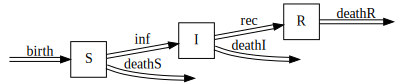

In [4]:
Graph(sir_LabelledLinkedStockFlowC)

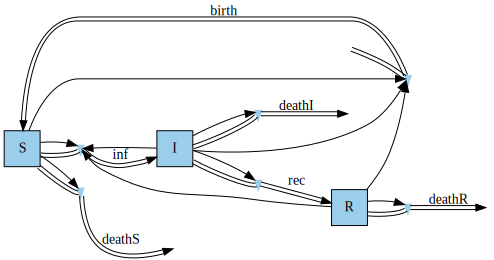

In [5]:
LGraph(sir_LabelledLinkedStockFlowC)

In [6]:
f_vacc_l(u,t)=u.S*0.1
f_deathV_l(u,t)=u.V*0.001

f_deathV_l (generic function with 1 method)

In [7]:
sv_LabelledLinkedStockFlowC=LabelledLinkedStockFlowC{Function, Int}((:vacc=>(f_vacc_l,:S), :deathV=>(f_deathV_l,:V)), (:S,990)=>(:F_NONE,:vacc,:vacc), (:V,0)=>(:vacc,:deathV,:deathV))

ACSet with elements F = 1:2, S = 1:2, I = 1:1, O = 1:2, L = 1:2
┌───┬────────────┬────────┬──────┐
│ F │   funcFlow │  fname │  fls │
├───┼────────────┼────────┼──────┤
│ 1 │   f_vacc_l │   vacc │ [:S] │
│ 2 │ f_deathV_l │ deathV │ [:V] │
└───┴────────────┴────────┴──────┘
┌───┬──────────────┬───────┐
│ S │ initialValue │ sname │
├───┼──────────────┼───────┤
│ 1 │          990 │     S │
│ 2 │            0 │     V │
└───┴──────────────┴───────┘
┌───┬─────┬────┐
│ I │ ifn │ is │
├───┼─────┼────┤
│ 1 │   1 │  2 │
└───┴─────┴────┘
┌───┬─────┬────┐
│ O │ ofn │ os │
├───┼─────┼────┤
│ 1 │   1 │  1 │
│ 2 │   2 │  2 │
└───┴─────┴────┘
┌───┬────┬────┐
│ L │ ls │ lf │
├───┼────┼────┤
│ 1 │  1 │  1 │
│ 2 │  2 │  2 │
└───┴────┴────┘

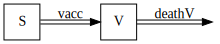

In [8]:
Graph(sv_LabelledLinkedStockFlowC)

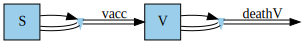

In [9]:
LGraph(sv_LabelledLinkedStockFlowC)

# Compose!

In [10]:
sirv = @relation (S,I,R,V) begin
  sir(S,I,R) 
  sv(S,V)
end

ACSet with elements Box = 1:2, Port = 1:5, OuterPort = 1:4, Junction = 1:4
┌─────┬──────┐
│ Box │ name │
├─────┼──────┤
│   1 │  sir │
│   2 │   sv │
└─────┴──────┘
┌──────┬─────┬──────────┐
│ Port │ box │ junction │
├──────┼─────┼──────────┤
│    1 │   1 │        1 │
│    2 │   1 │        2 │
│    3 │   1 │        3 │
│    4 │   2 │        1 │
│    5 │   2 │        4 │
└──────┴─────┴──────────┘
┌───────────┬────────────────┐
│ OuterPort │ outer_junction │
├───────────┼────────────────┤
│         1 │              1 │
│         2 │              2 │
│         3 │              3 │
│         4 │              4 │
└───────────┴────────────────┘
┌──────────┬──────────┐
│ Junction │ variable │
├──────────┼──────────┤
│        1 │        S │
│        2 │        I │
│        3 │        R │
│        4 │        V │
└──────────┴──────────┘

In [11]:
# Using uwd multiple cospan to compose
sir_sc=Open_S(sir_LabelledLinkedStockFlowC)
sv_sc=Open_S(sv_LabelledLinkedStockFlowC)
sv_dict = Dict(:sv=>sv_sc,:sir=>sir_sc);
sirv_stockflow = apex(oapply(sirv, sv_dict))

ACSet with elements F = 1:8, S = 1:4, I = 1:4, O = 1:7, L = 1:12
┌───┬────────────┬────────┬──────────────┐
│ F │   funcFlow │  fname │          fls │
├───┼────────────┼────────┼──────────────┤
│ 1 │  f_birth_l │  birth │ [:S, :I, :R] │
│ 2 │    f_inf_l │    inf │ [:S, :I, :R] │
│ 3 │    f_rec_l │    rec │         [:I] │
│ 4 │ f_deathS_l │ deathS │         [:S] │
│ 5 │ f_deathI_l │ deathI │         [:I] │
│ 6 │ f_deathR_l │ deathR │         [:R] │
│ 7 │   f_vacc_l │   vacc │         [:S] │
│ 8 │ f_deathV_l │ deathV │         [:V] │
└───┴────────────┴────────┴──────────────┘
┌───┬──────────────┬───────┐
│ S │ initialValue │ sname │
├───┼──────────────┼───────┤
│ 1 │          990 │     S │
│ 2 │           10 │     I │
│ 3 │            0 │     R │
│ 4 │            0 │     V │
└───┴──────────────┴───────┘
┌───┬─────┬────┐
│ I │ ifn │ is │
├───┼─────┼────┤
│ 1 │   1 │  1 │
│ 2 │   2 │  2 │
│ 3 │   3 │  3 │
│ 4 │   7 │  4 │
└───┴─────┴────┘
┌───┬─────┬────┐
│ O │ ofn │ os │
├───┼─────┼────┤
│ 1 │   2 │  1 │
│ 2 │   4 │  1 │
│ 3 │   3 │  2 │
│ 4 │   5 │  2 │
│ 5 │   6 │  3 │
│ 6 │   7 │  1 │
│ 7 │   8 │  4 │
└───┴─────┴────┘
┌────┬────┬────┐
│  L │ ls │ lf │
├────┼────┼────┤
│  1 │  1 │  1 │
│  2 │  1 │  2 │
│  3 │  1 │  4 │
│  4 │  2 │  1 │
│  5 │  2 │  2 │
│  6 │  2 │  3 │
│  7 │  2 │  5 │
│  8 │  3 │  1 │
│  9 │  3 │  2 │
│ 10 │  3 │  6 │
│ 11 │  1 │  7 │
│ 12 │  4 │  8 │
└────┴────┴────┘

In [12]:
checkLinks(sirv_stockflow)

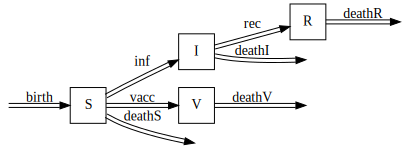

In [13]:
Graph(sirv_stockflow)

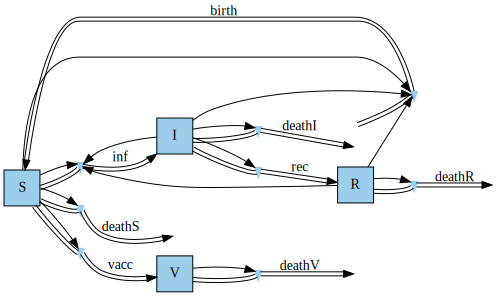

In [14]:
LGraph(sirv_stockflow)

## Ok, now, after composition, the functions of some flows are not correct and need to be updated!

### for example, in this composed model, the total population should be: S+I+R+V, instead of S+I+R in the original SIR model:

In [16]:
f_birth_l(u,t)=0.001*(u.S+u.I+u.R+u.V)
f_inf_l(u,t)= 0.1*u.S*u.I/(u.S+u.I+u.R+u.V)

f_inf_l (generic function with 1 method)

### since the functions changed, we need to update the dependant stocks of the modified functions in the model structure:

In [23]:
sirv_stockflow.tables.F.fls[1] = [:S,:I,:R,:V]
sirv_stockflow.tables.F.fls[2] = [:S,:I,:R,:V]

4-element Array{Symbol,1}:
 :S
 :I
 :R
 :V

In [24]:
sirv_stockflow

ACSet with elements F = 1:8, S = 1:4, I = 1:4, O = 1:7, L = 1:12
┌───┬────────────┬────────┬──────────────────┐
│ F │   funcFlow │  fname │              fls │
├───┼────────────┼────────┼──────────────────┤
│ 1 │  f_birth_l │  birth │ [:S, :I, :R, :V] │
│ 2 │    f_inf_l │    inf │ [:S, :I, :R, :V] │
│ 3 │    f_rec_l │    rec │             [:I] │
│ 4 │ f_deathS_l │ deathS │             [:S] │
│ 5 │ f_deathI_l │ deathI │             [:I] │
│ 6 │ f_deathR_l │ deathR │             [:R] │
│ 7 │   f_vacc_l │   vacc │             [:S] │
│ 8 │ f_deathV_l │ deathV │             [:V] │
└───┴────────────┴────────┴──────────────────┘
┌───┬──────────────┬───────┐
│ S │ initialValue │ sname │
├───┼──────────────┼───────┤
│ 1 │          990 │     S │
│ 2 │           10 │     I │
│ 3 │            0 │     R │
│ 4 │            0 │     V │
└───┴──────────────┴───────┘
┌───┬─────┬────┐
│ I │ ifn │ is │
├───┼─────┼────┤
│ 1 │   1 │  1 │
│ 2 │   2 │  2 │
│ 3 │   3 │  3 │
│ 4 │   7 │  4 │
└───┴─────┴────┘
┌───┬─────┬────┐
│ O │ ofn │ os │
├───┼─────┼────┤
│ 1 │   2 │  1 │
│ 2 │   4 │  1 │
│ 3 │   3 │  2 │
│ 4 │   5 │  2 │
│ 5 │   6 │  3 │
│ 6 │   7 │  1 │
│ 7 │   8 │  4 │
└───┴─────┴────┘
┌────┬────┬────┐
│  L │ ls │ lf │
├────┼────┼────┤
│  1 │  1 │  1 │
│  2 │  1 │  2 │
│  3 │  1 │  4 │
│  4 │  2 │  1 │
│  5 │  2 │  2 │
│  6 │  2 │  3 │
│  7 │  2 │  5 │
│  8 │  3 │  1 │
│  9 │  3 │  2 │
│ 10 │  3 │  6 │
│ 11 │  1 │  7 │
│ 12 │  4 │  8 │
└────┴────┴────┘

In [25]:
checkLinks(sirv_stockflow)

LoadError: AssertionError: For flow: birth, the user-defined function depend stocks [:I, :R, :S, :V] is not equal to the link's depend stocks [:I, :R, :S]!

### Ok, Now, add links between the stocks and modified functions

In [26]:
add_links!(sirv_stockflow,2,[4,4],[1,2])

13:14

In [27]:
sirv_stockflow

ACSet with elements F = 1:8, S = 1:4, I = 1:4, O = 1:7, L = 1:14
┌───┬────────────┬────────┬──────────────────┐
│ F │   funcFlow │  fname │              fls │
├───┼────────────┼────────┼──────────────────┤
│ 1 │  f_birth_l │  birth │ [:S, :I, :R, :V] │
│ 2 │    f_inf_l │    inf │ [:S, :I, :R, :V] │
│ 3 │    f_rec_l │    rec │             [:I] │
│ 4 │ f_deathS_l │ deathS │             [:S] │
│ 5 │ f_deathI_l │ deathI │             [:I] │
│ 6 │ f_deathR_l │ deathR │             [:R] │
│ 7 │   f_vacc_l │   vacc │             [:S] │
│ 8 │ f_deathV_l │ deathV │             [:V] │
└───┴────────────┴────────┴──────────────────┘
┌───┬──────────────┬───────┐
│ S │ initialValue │ sname │
├───┼──────────────┼───────┤
│ 1 │          990 │     S │
│ 2 │           10 │     I │
│ 3 │            0 │     R │
│ 4 │            0 │     V │
└───┴──────────────┴───────┘
┌───┬─────┬────┐
│ I │ ifn │ is │
├───┼─────┼────┤
│ 1 │   1 │  1 │
│ 2 │   2 │  2 │
│ 3 │   3 │  3 │
│ 4 │   7 │  4 │
└───┴─────┴────┘
┌───┬─────┬────┐
│ O │ ofn │ os │
├───┼─────┼────┤
│ 1 │   2 │  1 │
│ 2 │   4 │  1 │
│ 3 │   3 │  2 │
│ 4 │   5 │  2 │
│ 5 │   6 │  3 │
│ 6 │   7 │  1 │
│ 7 │   8 │  4 │
└───┴─────┴────┘
┌────┬────┬────┐
│  L │ ls │ lf │
├────┼────┼────┤
│  1 │  1 │  1 │
│  2 │  1 │  2 │
│  3 │  1 │  4 │
│  4 │  2 │  1 │
│  5 │  2 │  2 │
│  6 │  2 │  3 │
│  7 │  2 │  5 │
│  8 │  3 │  1 │
│  9 │  3 │  2 │
│ 10 │  3 │  6 │
│ 11 │  1 │  7 │
│ 12 │  4 │  8 │
│ 13 │  4 │  1 │
│ 14 │  4 │  2 │
└────┴────┴────┘

In [28]:
checkLinks(sirv_stockflow)

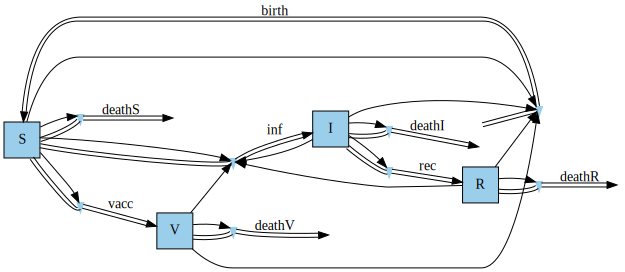

In [29]:
LGraph(sirv_stockflow)

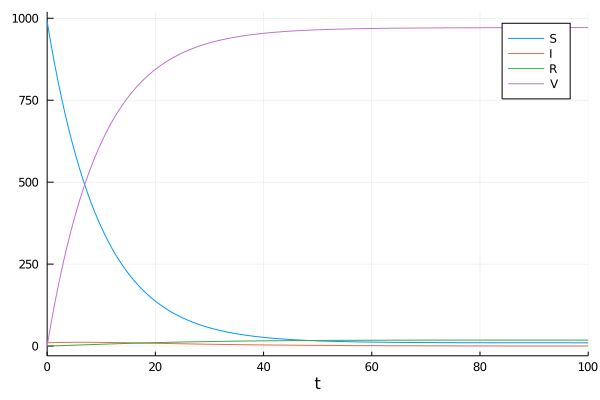

In [31]:
prob_sirv = ODEProblem(vectorfield(sirv_stockflow),initialValues(sirv_stockflow),(0.0,100.0),funcFlows(sirv_stockflow));
sol_sirv = solve(prob_sirv,Tsit5(),abstol=1e-8);
plot(sol_sirv)


In [34]:
sum(sol_sirv[24])

999.9999999999999